### 2021_11_03_5

### Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# 4개의 데이터 셋 반환(numpy 배열)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("학습용 데이터 : x : {}, y : {}".format(train_images.shape, train_labels.shape))
print("테스트 데이터 : x : {}, y : {}".format(test_images.shape, test_labels.shape))

학습용 데이터 : x : (60000, 28, 28), y : (60000,)
테스트 데이터 : x : (10000, 28, 28), y : (10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print("학습용 데이터의 레이블 :", np.unique(train_labels))

학습용 데이터의 레이블 : [0 1 2 3 4 5 6 7 8 9]


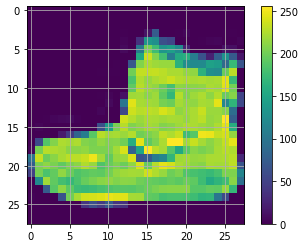

In [6]:
plt.figure()
plt.imshow(train_images[0])   # 첫번째 이미지 데이터
plt.colorbar()     # 색깔 표시바 
plt.grid(True)   # grid 선 
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 이미지 확인

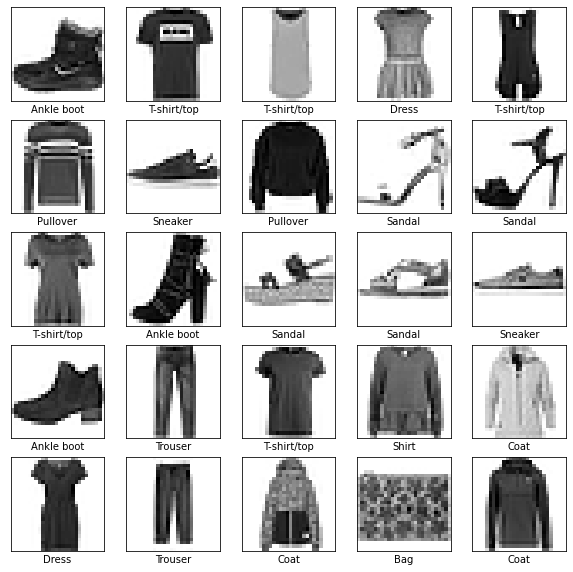

In [8]:
plt.figure(figsize = (10, 10))

for i in range(25) :
    plt.subplot(5, 5, i + 1)  # 그래프의 표시 위치
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  # 그리드선
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 생성

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10)

2021-11-03 14:33:17.911226: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.4988 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.3753 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.3372 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.3122 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.2791 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.2655 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.2562 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2464 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/st

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도 :', test_acc)

313/313 - 0s - loss: 0.3430 - accuracy: 0.8793

테스트 정확도 : 0.8792999982833862


### 예측하기
* 훈련된 모델을 사용하여 이미지에 대한 예측 해보기
* 테스트 세트에 대한 각 이미지의 레이블을 예측. 10개의 숫자배열로 나타난다.

In [19]:
predictions = model.predict(test_images)
predictions[0]

array([9.3435437e-10, 3.9506289e-13, 1.3240267e-10, 1.9284396e-14,
       1.3804538e-10, 1.0495232e-04, 7.3347099e-11, 1.8585785e-03,
       3.8902170e-10, 9.9803644e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
### 10개의 데이터에 대해 확인
np.argmax(predictions, axis=1)[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [23]:
### 10개의 데이터에 대한 실제값
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

### 이미지 데이터 시각화

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)  # 이미지 표시 

    # 정확하게 맞춰을 경우, blue(파란), 아니면 red(적색)으로 표시
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

### 막대 그래프로 표시

In [25]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

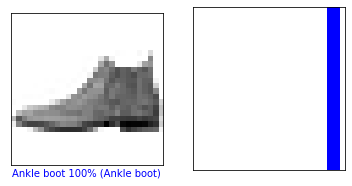

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)  # 이미지 표시 
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)        # 막대 그래프 표시
plt.show()

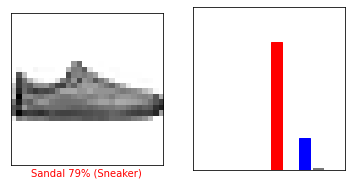

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

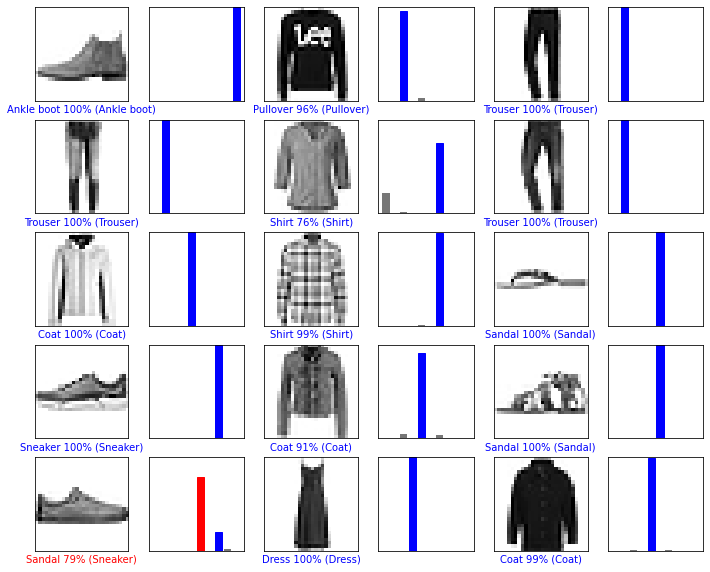

In [28]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### 이미지 하나 예측

(28, 28)
(1, 28, 28)
[[9.3435437e-10 3.9506666e-13 1.3240292e-10 1.9284433e-14 1.3804512e-10
  1.0495252e-04 7.3347231e-11 1.8585803e-03 3.8902170e-10 9.9803644e-01]]


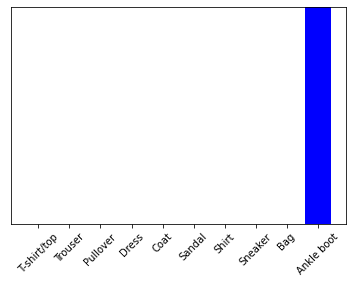

In [29]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img, 0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [30]:
idx = np.argmax(predictions_single[0])
print(idx)
print(class_names[idx])

9
Ankle boot
